# Torchvision의 datasets으로 FashionMNIST 데이터 가져오기

In [3]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST

BATCH_SIZE = 64

# Dataset 준비
download_root = r"D:\NoShare\FashionMNIST"
train_dataset = FashionMNIST(download_root, transform=transforms.ToTensor(), train=True, download=True)
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

In [4]:
# GPU 사용 여부를 체크
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

print(DEVICE)

cuda


# AutoEncoder 모델 구축
+ encoder 28 * 28 -----> 64
+ decoder 64 ----------> 28 * 28
+ 부호화된 인풋을 다시 복화하는 과정

In [6]:
from torch import nn, optim

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
        )

        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

model

AE(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
  )
)

In [7]:
view_data = train_dataset.data[:5].view(-1, 28 * 28)
view_data = view_data.type(torch.FloatTensor) / 255.

In [17]:
def train(epoch, model, train_loader, optimizer):
    model.train()
    for step, (x, label) in enumerate(train_loader):
        x = x.view(-1, 28 * 28).to(DEVICE)
        y = x.view(-1, 28 * 28).to(DEVICE)
        label = label.to(DEVICE)

        encoded, decoded = model(x)
        loss = criterion(decoded, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 100 == 0:
            print(f"Train Epoch: {epoch} [{step * len(x)}/{len(train_loader.dataset)} ({100. * step / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.281054
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.040989
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.037976
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.028907
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.026387
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.027789
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.024240
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.023999
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.024172
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.022050
[EPOCH: 1]


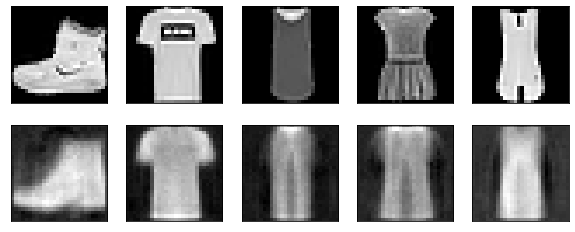

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.022832
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.022246
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.021620
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.018701
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.021645
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.017399
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.019206
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.015802
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.017672
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.017760
[EPOCH: 2]


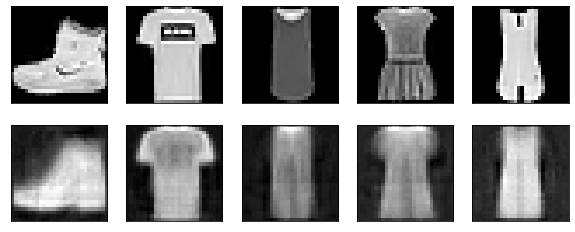

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.017209
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.016558
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.014986
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.015953
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.016878
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.014598
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.016114
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.015548
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.015610
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.014280
[EPOCH: 3]


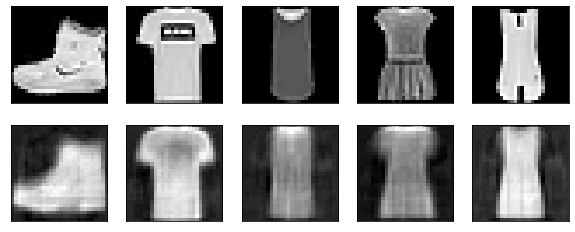

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.015626
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.013126
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.012204
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.014321
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.014973
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.015468
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.015089
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.012131
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.011918
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014748
[EPOCH: 4]


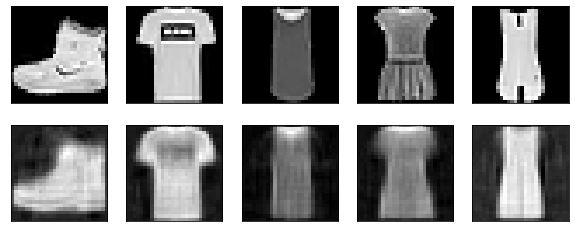

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.012286
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.012146
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.014627
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.013065
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.012238
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.013759
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.013708
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.012551
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.012178
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.014180
[EPOCH: 5]


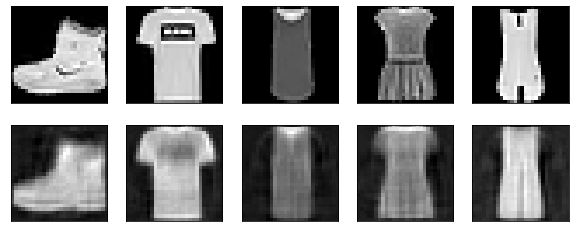

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.013611
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.012279
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.010957
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.013567
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.014117
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.011897
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.012425
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.012426
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.013151
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.012016
[EPOCH: 6]


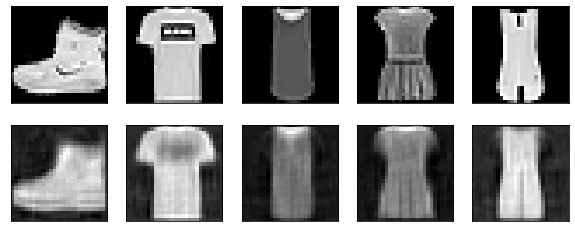

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.013075
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.011333
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.012465
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.011978
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.012128
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.010371
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.013645
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.011640
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.012819
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.011327
[EPOCH: 7]


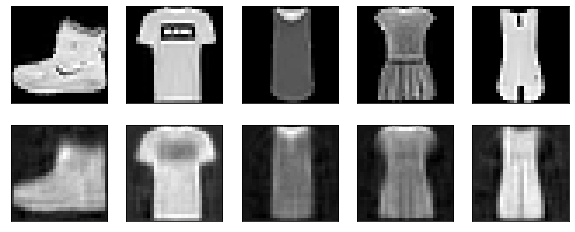

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.011083
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.011889
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.010849
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.011978
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.012996
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.011546
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.011604
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.010581
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.013336
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.010625
[EPOCH: 8]


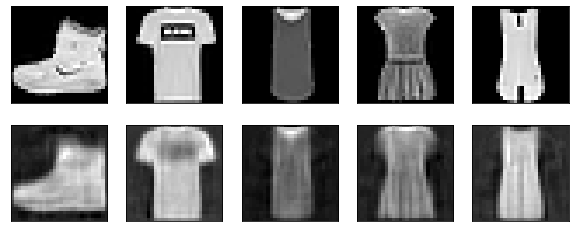

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.012268
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.010945
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.011282
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.011697
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.010509
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.010118
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.011169
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.011335
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.011250
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.010320
[EPOCH: 9]


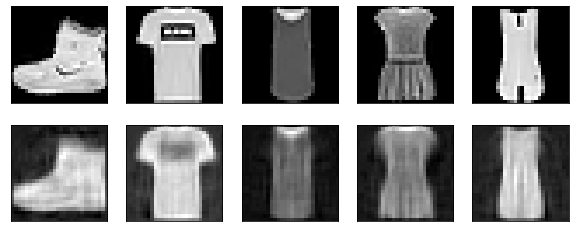

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.011605
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.009933
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.011748
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.012561
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.011275
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.009977
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.011296
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.009800
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.010262
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.010239
[EPOCH: 10]


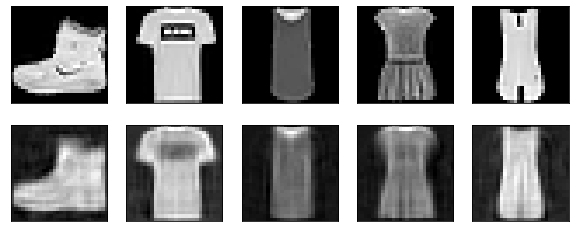

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Training을 시작하는 함수
def run_training(model, epochs=10):
    for epoch in range(1, epochs + 1):
        train(epoch, model, train_loader, optimizer)

        test_x = view_data.to(DEVICE)
        encoded_data, decoded_data = model(test_x)

        f, a = plt.subplots(2, 5, figsize=(10,4))
        print(f"[EPOCH: {epoch}]")
        for i in range(5):
            img = np.reshape(view_data.data.numpy()[i], (28, 28))
            a[0][i].imshow(img, cmap="gray")
            a[0][i].set_xticks(())
            a[0][i].set_yticks(())
        for i in range(5):
            img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
            a[1][i].imshow(img, cmap="gray")
            a[1][i].set_xticks(())
            a[1][i].set_yticks(())
        plt.show()

run_training(model)

# 활성함수로 Sigmoid 함수를 사용했을 때

## ReLU -> 0이하는 전부 없어짐
+ 데이터의 손실을 최소화하기 위해서 ReLU 사용은 지양
## Sigmod -> 0~1 사이로 살아있음 
+ ReLU보다 데이터 손실을 적게할 수 있다.


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.278719
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.042753
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.036814
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.028713
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.027664
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.024050
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.022063
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.023377
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.024858
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.021241
[EPOCH: 1]


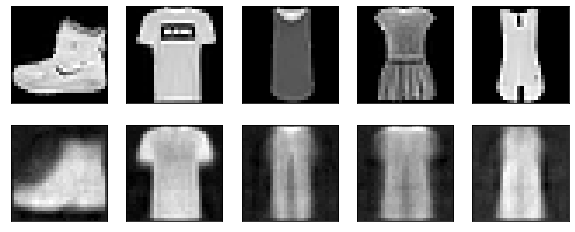

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.020996
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.018561
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.018346
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.019872
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.018318
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.016406
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.015653
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.015851
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.015367
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.015625
[EPOCH: 2]


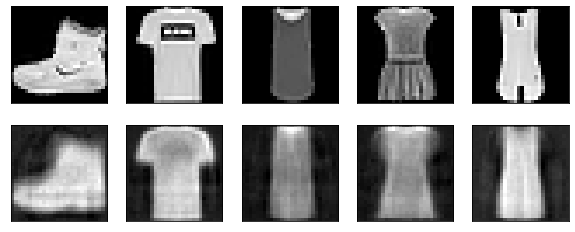

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.016790
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.016948
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.017884
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.016513
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.016138
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.015485
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.015123
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.014367
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.014940
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.014980
[EPOCH: 3]


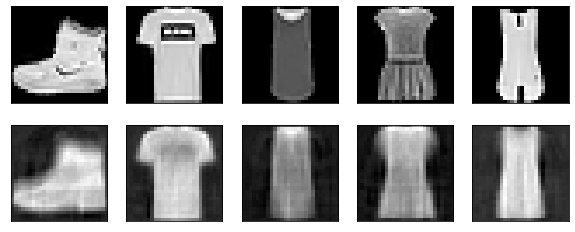

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.014669
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.013976
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.013176
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.013390
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.014645
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.011476
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.014998
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.012809
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.013547
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.014987
[EPOCH: 4]


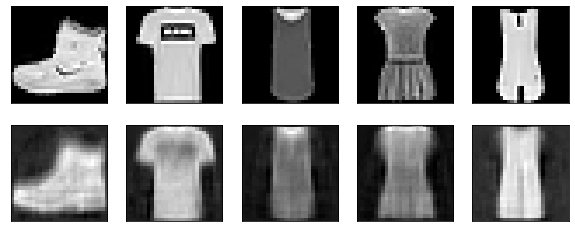

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.012909
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.014135
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.012467
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.012587
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.012547
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.015070
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.012304
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.012177
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.013363
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.012681
[EPOCH: 5]


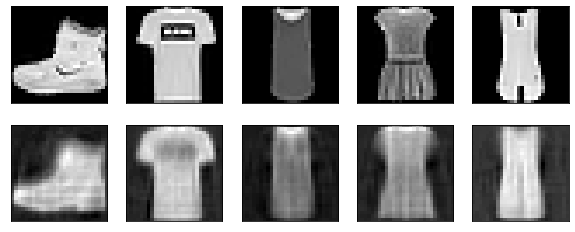

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.013705
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.012073
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.014037
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.011182
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.012886
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.012988
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.011741
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.010729
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.010241
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.011207
[EPOCH: 6]


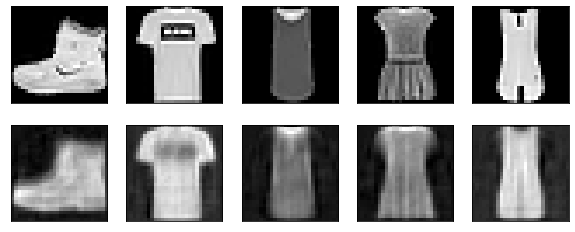

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.015125
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.011496
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.011199
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.012205
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.010237
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.012614
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.010284
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.011541
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.010646
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.012099
[EPOCH: 7]


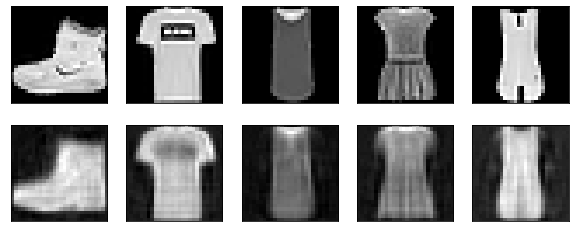

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.011358
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.010203
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.013194
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.011950
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.011082
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.011080
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.010205
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.011750
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.012456
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.009518
[EPOCH: 8]


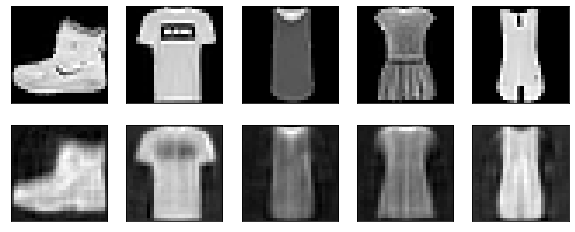

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.011522
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.011410
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.010654
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.009092
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.010741
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.009496
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.011173
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.010703
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.011205
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.010214
[EPOCH: 9]


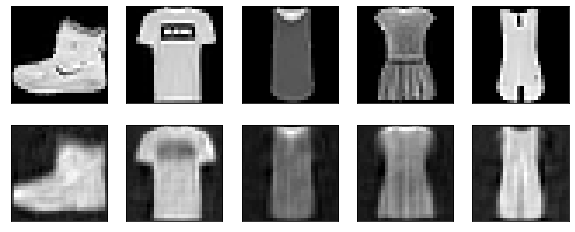

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.011883
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.010559
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.009931
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.011334
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.011734
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.010813
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.011315
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.010702
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.011354
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.011233
[EPOCH: 10]


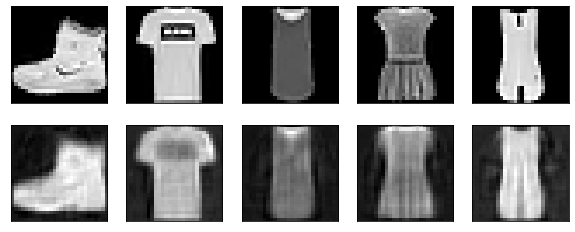

In [30]:
from torch import nn, optim

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
        )

        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Sigmoid(),
            nn.Linear(128, 28 * 28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

run_training(model)

# 활성함수로 Tanh 함수를 사용했을 때

## Sigmod -> 0~1 사이로 살아있음
## Tanh -> -1 ~ 1 사이니까 데이터를 더 잘 살릴 수 있지 않을까?


Train Epoch: 1 [0/60000 (0%)]	Loss: 0.237805
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.024510
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.022259
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.020276
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.018343
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.013566
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.015954
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.015349
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.017739
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.013741
[EPOCH: 1]


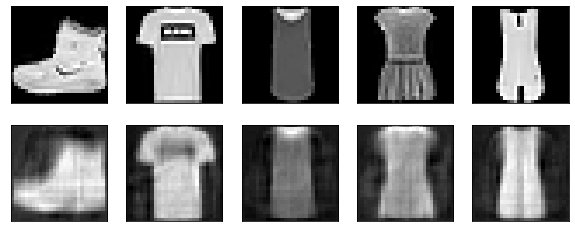

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.015259
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.012996
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.014597
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.013745
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.012861
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.014652
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.013722
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.014003
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.013552
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.011916
[EPOCH: 2]


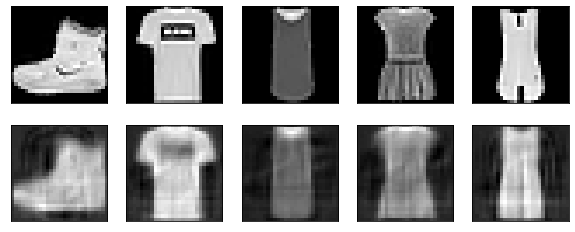

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.012221
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.011603
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.013638
Train Epoch: 3 [19200/60000 (32%)]	Loss: 0.013709
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.011228
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.013233
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.013620
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.013299
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.014335
Train Epoch: 3 [57600/60000 (96%)]	Loss: 0.012609
[EPOCH: 3]


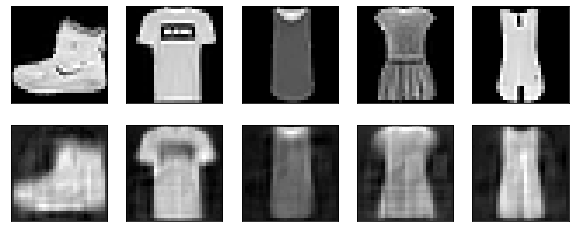

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.012049
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.592026
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.046771
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.041672
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.036765
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.028399
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.025798
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.031577
Train Epoch: 4 [51200/60000 (85%)]	Loss: 0.027696
Train Epoch: 4 [57600/60000 (96%)]	Loss: 0.023862
[EPOCH: 4]


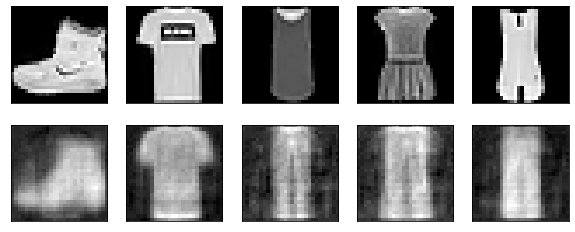

Train Epoch: 5 [0/60000 (0%)]	Loss: 0.026890
Train Epoch: 5 [6400/60000 (11%)]	Loss: 0.025850
Train Epoch: 5 [12800/60000 (21%)]	Loss: 0.023406
Train Epoch: 5 [19200/60000 (32%)]	Loss: 0.021935
Train Epoch: 5 [25600/60000 (43%)]	Loss: 0.023790
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.021280
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.021974
Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.025282
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.020716
Train Epoch: 5 [57600/60000 (96%)]	Loss: 0.022230
[EPOCH: 5]


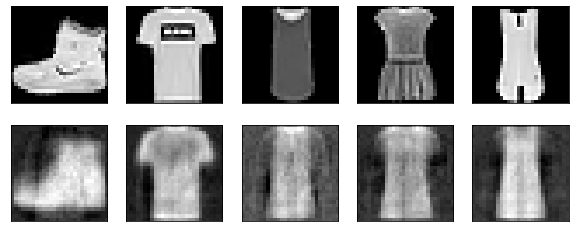

Train Epoch: 6 [0/60000 (0%)]	Loss: 0.023881
Train Epoch: 6 [6400/60000 (11%)]	Loss: 0.022379
Train Epoch: 6 [12800/60000 (21%)]	Loss: 0.021089
Train Epoch: 6 [19200/60000 (32%)]	Loss: 0.019521
Train Epoch: 6 [25600/60000 (43%)]	Loss: 0.022445
Train Epoch: 6 [32000/60000 (53%)]	Loss: 0.021012
Train Epoch: 6 [38400/60000 (64%)]	Loss: 0.018714
Train Epoch: 6 [44800/60000 (75%)]	Loss: 0.018924
Train Epoch: 6 [51200/60000 (85%)]	Loss: 0.018519
Train Epoch: 6 [57600/60000 (96%)]	Loss: 0.019486
[EPOCH: 6]


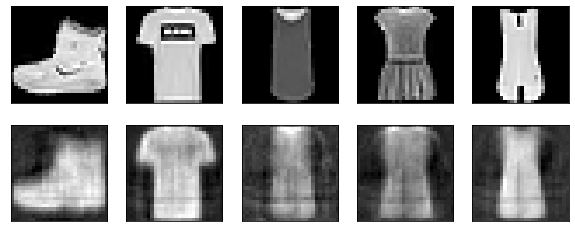

Train Epoch: 7 [0/60000 (0%)]	Loss: 0.019031
Train Epoch: 7 [6400/60000 (11%)]	Loss: 0.017091
Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.018850
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.017056
Train Epoch: 7 [25600/60000 (43%)]	Loss: 0.016919
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.017230
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.016246
Train Epoch: 7 [44800/60000 (75%)]	Loss: 0.016297
Train Epoch: 7 [51200/60000 (85%)]	Loss: 0.014995
Train Epoch: 7 [57600/60000 (96%)]	Loss: 0.018324
[EPOCH: 7]


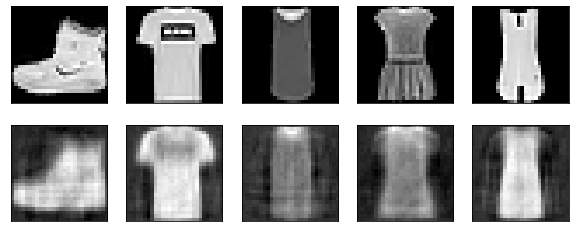

Train Epoch: 8 [0/60000 (0%)]	Loss: 0.014611
Train Epoch: 8 [6400/60000 (11%)]	Loss: 0.016275
Train Epoch: 8 [12800/60000 (21%)]	Loss: 0.019396
Train Epoch: 8 [19200/60000 (32%)]	Loss: 0.015315
Train Epoch: 8 [25600/60000 (43%)]	Loss: 0.018028
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.016938
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.016281
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.019420
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.014183
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.015145
[EPOCH: 8]


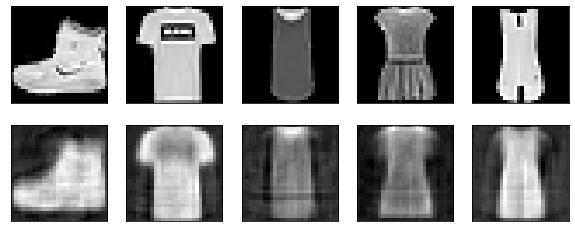

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.014871
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.016615
Train Epoch: 9 [12800/60000 (21%)]	Loss: 0.014446
Train Epoch: 9 [19200/60000 (32%)]	Loss: 0.015099
Train Epoch: 9 [25600/60000 (43%)]	Loss: 0.014049
Train Epoch: 9 [32000/60000 (53%)]	Loss: 0.015492
Train Epoch: 9 [38400/60000 (64%)]	Loss: 0.016208
Train Epoch: 9 [44800/60000 (75%)]	Loss: 0.015119
Train Epoch: 9 [51200/60000 (85%)]	Loss: 0.014943
Train Epoch: 9 [57600/60000 (96%)]	Loss: 0.015397
[EPOCH: 9]


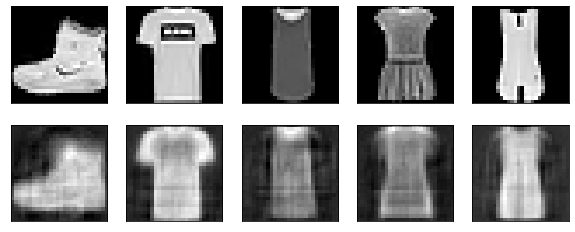

Train Epoch: 10 [0/60000 (0%)]	Loss: 0.014479
Train Epoch: 10 [6400/60000 (11%)]	Loss: 0.014554
Train Epoch: 10 [12800/60000 (21%)]	Loss: 0.014799
Train Epoch: 10 [19200/60000 (32%)]	Loss: 0.014562
Train Epoch: 10 [25600/60000 (43%)]	Loss: 0.015002
Train Epoch: 10 [32000/60000 (53%)]	Loss: 0.014842
Train Epoch: 10 [38400/60000 (64%)]	Loss: 0.015871
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.015684
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.015233
Train Epoch: 10 [57600/60000 (96%)]	Loss: 0.014963
[EPOCH: 10]


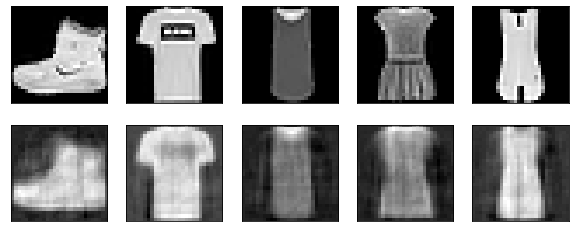

In [32]:
from torch import nn, optim

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
        )

        
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28 * 28),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

model = AE().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

run_training(model)

# AutoEncoder 결과값을 활용

## Encoder network : latent variable이 생성
+ latent variable 값 자체가 원래 이미지를 잘 압축됐다고 본다.
+ Encoder network를 input으로 많이 사용
## Decoder : 원래 값을 복원

In [40]:
import time
import lightgbm as lgb
from sklearn.metrics import accuracy_score

start = time.time()
lgb_dtrain = lgb.Dataset(data=train_dataset.train_data.view(-1, 28 * 28).numpy(), label=list(train_dataset.train_labels.numpy()))
lgb_param = {
    "max_depth": 10,
    "learning_rate": 0.001,
    "n_estimators": 20,
    "objective": "multiclass",
    "num_class": len(set(list(train_dataset.train_labels.numpy()))) + 1
}
num_round = 10000
lgb_model = lgb.train(params=lgb_param, num_boost_round=num_round, train_set=lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(train_dataset.train_data.view(-1, 28 * 28).numpy()), axis=1)
print(f"Accuracy: {accuracy_score(list(train_dataset.train_labels.numpy()), lgb_model_predict) * 100:.2f} %")
print(f"Time: {time.time() - start:.2f} seconds")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.353371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170881
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 783
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [I

In [44]:
train_dataset.train_data.view(-1, 28 * 28).numpy()[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# Latent variable을 Input으로 학습

## Encoded data로 학습 진행시 더 빠르게 끝난다.
## 비슷한 정확도를 보인다.
## Encoded_data가 64 차원으로 압축되어 있는 모습을 확인할 수 있다.

In [49]:
train_encoded_x = train_dataset.train_data.view(-1, 28 * 28).to(DEVICE)
train_encoded_x = train_encoded_x.type(torch.FloatTensor)
train_encoded_x = train_encoded_x.to(DEVICE)
encoded_data, decoded_data = model(train_encoded_x)
encoded_data = encoded_data.to("cpu")

start = time.time()
lgb_dtrain = lgb.Dataset(data=encoded_data.detach().numpy(), label=list(train_dataset.train_labels.numpy()))
lgb_param = {
    "max_depth": 10,
    "learning_rate": 0.001,
    "n_estimators": 20,
    "objective": "multiclass",
    "num_class": len(set(list(train_dataset.train_labels.numpy()))) + 1
}
num_round = 10000
lgb_model = lgb.train(params=lgb_param, num_boost_round=num_round, train_set=lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(encoded_data.detach().numpy()), axis=1)
print(f"Accuracy: {accuracy_score(list(train_dataset.train_labels.numpy()), lgb_model_predict) * 100:.2f} %")
print(f"Time: {time.time() - start:.2f} seconds")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16320
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 64
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Inf

In [50]:
encoded_data.detach().numpy()[0]

array([-9.92641091e-01,  1.10339868e+00,  2.89167881e-01, -1.08401805e-01,
        1.04683787e-01, -1.28253073e-01, -7.61075199e-01, -8.95373896e-02,
       -1.54122561e-02, -3.84645700e-01, -1.89172521e-01,  9.50723141e-02,
       -1.03738797e+00, -6.51349366e-01, -3.29791009e-01, -4.29161668e-01,
       -2.86893368e-01,  3.70534241e-01, -2.98734307e-01, -1.16945863e+00,
       -4.26280238e-02, -9.17670876e-02,  1.24964625e-01,  6.71635091e-01,
       -6.64004505e-01,  8.96161914e-01,  2.93155432e-01,  3.77158254e-01,
        1.27606630e-01, -1.36587441e-01,  1.47598851e+00, -4.25735593e-01,
        1.37012839e+00, -2.78518200e-01,  2.08897138e+00,  1.90027840e-02,
       -3.51684600e-01, -2.90889293e-03, -7.12739885e-01, -1.96130112e-01,
       -3.45163494e-01,  6.90001369e-01, -4.81580585e-01, -3.65462065e+00,
        3.56409878e-01, -2.04594731e-02,  4.06328030e-02, -2.02308476e-01,
       -3.42661321e-01, -1.00969002e-01, -1.55742347e-01,  3.42253000e-02,
        3.96683142e-02,  